Original shape: (569, 30)
Reduced shape: (569, 2)
Explained variance ratio: [0.44272026 0.18971182]

PC 1 without scaling:
 [ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
  4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
  7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
  2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
  8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
  7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
  6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
  1.78986262e-05  1.61356159e-06]


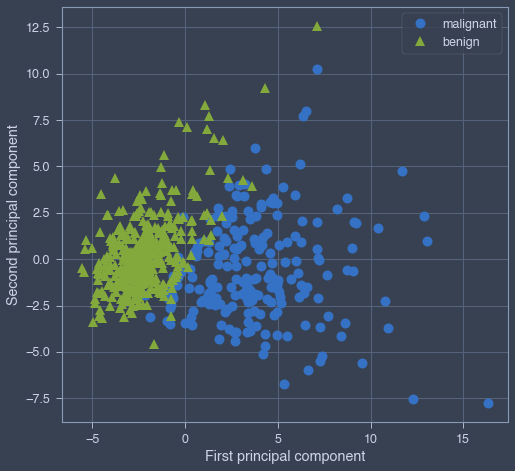

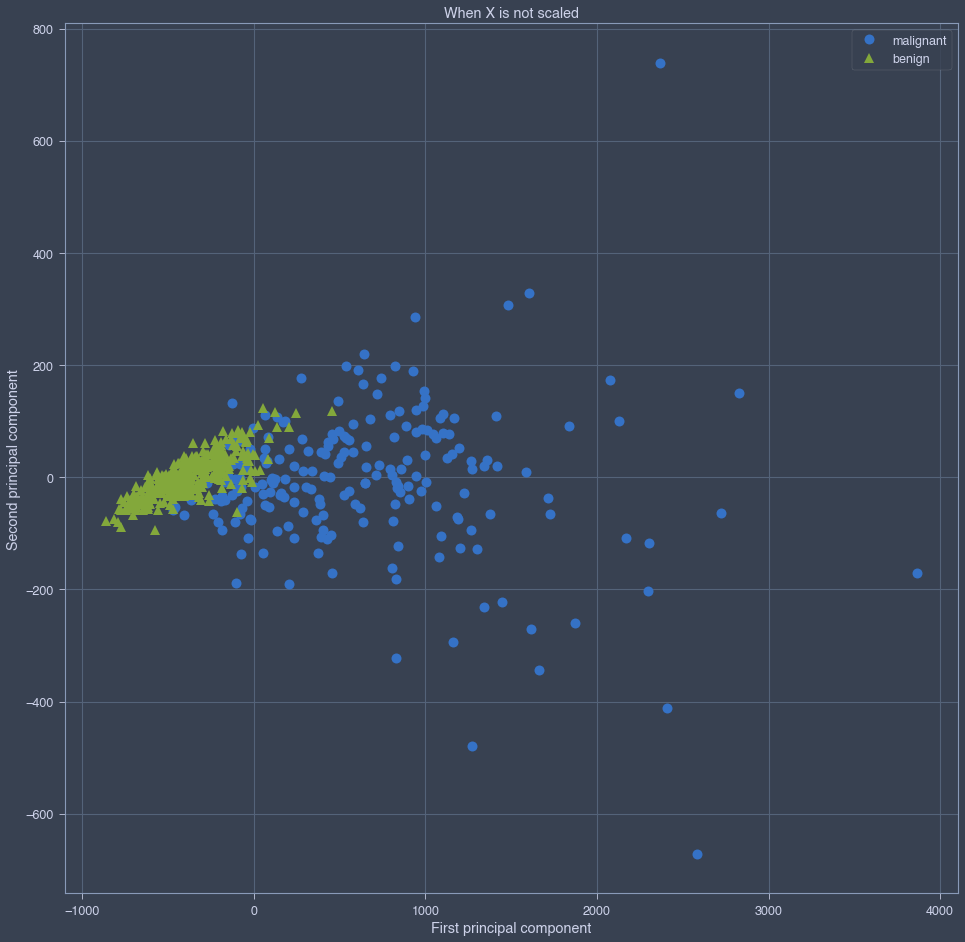

In [48]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import mglearn

np.random.seed(0)

cancer = load_breast_cancer()
scaler = StandardScaler() 
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
# keep the first two principal components of the data 
pca = PCA(n_components=2)
# fit PCA model to breast cancer data 
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))
print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target) 
plt.legend(cancer.target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

unscaled_pca = PCA(n_components=2)
unscaled_pca.fit(cancer.data)
unscaledX_pca = unscaled_pca.transform(cancer.data)

plt.figure(figsize=(16, 16))
mglearn.discrete_scatter(unscaledX_pca[:, 0], unscaledX_pca[:, 1], cancer.target) 
plt.legend(cancer.target_names, loc="best") 
plt.title("When X is not scaled")
#plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
print('\nPC 1 without scaling:\n', unscaled_pca.components_[0])

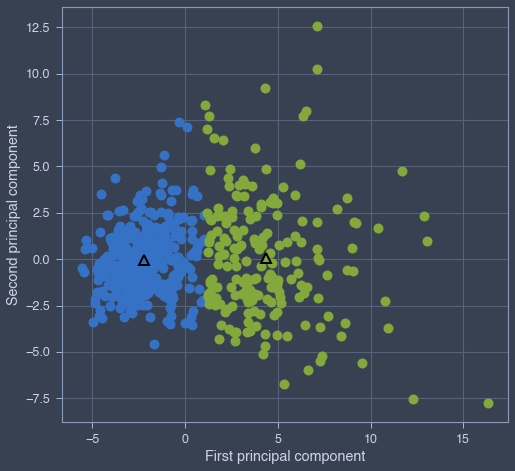

In [39]:
from sklearn.cluster import KMeans
#np.random.seed(3)

# build the clustering model
pca_kmeans = KMeans(n_clusters=2, random_state=17, n_init=100) 
pca_kmeans.fit(X_pca)

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], pca_kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    pca_kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0, 1], markers='^', markeredgewidth=2)

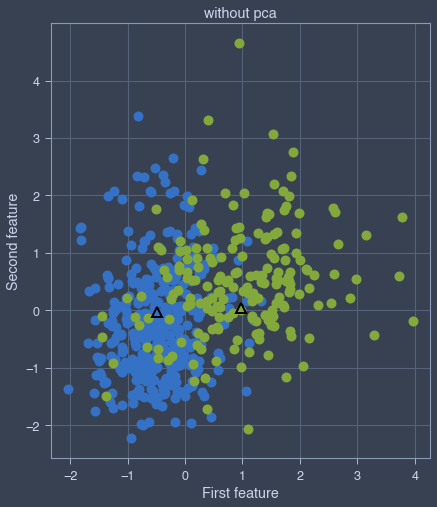

In [50]:
kmeans = KMeans(n_clusters=2, random_state = 17, n_init=100) 
kmeans.fit(X_scaled)

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("without pca")
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0, 1], markers='^', markeredgewidth=2)

In [41]:
from sklearn.metrics.cluster import fowlkes_mallows_score

labels_true = cancer.target
labels_pred = kmeans.labels_
pca_labels_pred = pca_kmeans.labels_

print(fowlkes_mallows_score(labels_true, labels_pred))
print(fowlkes_mallows_score(labels_true, pca_labels_pred))

0.8498367288134844
0.844168964024566


In [42]:
from purity import purity_score

pca_labels_pred = pca_kmeans.labels_

print(purity_score(labels_true, labels_pred))
print(purity_score(labels_true, pca_labels_pred))

0.9103690685413005
0.9068541300527241


In [43]:
from sklearn.metrics.cluster import adjusted_rand_score

print(adjusted_rand_score(labels_true, labels_pred))
print(adjusted_rand_score(labels_true, pca_labels_pred))

0.6707206476880808
0.6592305570949524


In [49]:
"$x^2$"

'$x^2$'